## Libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Users/diego/Desktop/tangelo/")

## Reading Data

### Application Records Dataset

In [152]:
#Application Records dataset
app_df = pd.read_csv("./data/application_record.csv")
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


- `ID`: Client Id (Unique)
- `CODE_GENDER`: Gender (M: Male, F: Female). _(Boolean)_
- `FLAG_OWN_CAR`: Is ther a car. _(Boolean)_
- `FLAG_OWN_REALTY`: Is there a property. _(Boolean)_
- `CNT_CHILDREN`: Number of Childer. _(Int)_
- `AMT_INCOME_TOTAL`: Annual Income. _(Float)_
- `NAME_INCOME_TYPE`: Income Category. _(Nominal Variable)_
- `NAME_EDUCATION_TYPE`: Educational Level. _(Nominal Variable 1-5)_ 
- `NAME_FAMILY_STATUS`: Maritial Status. _(Nominal Variable 1-6)_
- `DAYS_BIRTH`: The number of the days from birth. _(Int)_
- `DAYS_EMPLOYED`: The number of the days from employed. _(Int)_
- `FLAG_MOBIL`: Is there a mobile-phone. _(Boolean)_
- `FLAG_WORK_PHONE`: Is there a work-phone. _(Boolean)_
- `FLAG_PHONE`: Is there a phone. _(Boolean)_
- `FLAG_EMAIL`: Is there an email. _(Boolean)_
- `OCCUPATION_TYPE`: Occupation. _(Nominal Variable 1-20)_
- `CNT_FAM_MEMBERS`: Family Size. _(Int)_

In [153]:
#Occupation type column is the only one with NA values.
# Which is around of the 30 % of the dataset, we will not remove it but instead rename it. 
print(app_df["OCCUPATION_TYPE"].isna().mean())
app_df['OCCUPATION_TYPE'].fillna('Other', inplace=True)

0.30601039317580153


### Credit Records Dataset

In [154]:
#Credit Records
cred_df=pd.read_csv("./data/credit_record.csv")
# We ony want the last month of information
cred_df=cred_df.groupby('ID').agg({'MONTHS_BALANCE': 'max', 'STATUS': 'first'}).reset_index()
cred_df.drop("MONTHS_BALANCE",axis=1,inplace=True)
# Filter dataset, we only want the IDs that has information in the app_df.
cred_df = cred_df[cred_df['ID'].isin(app_df.ID.unique())]
#People with no loans or that have paid off will be catalogized as 0 (No Risk).
cred_df['STATUS'] = cred_df['STATUS'].replace(['X', 'C'], '0')
cred_df['STATUS'] = cred_df['STATUS'].astype(int)

cred_df.head()

,ID,STATUS
3231,5008804,0
3232,5008805,0
3233,5008806,0
3234,5008808,0
3235,5008809,0


- `ID`: Client Id (Unique)
- `MONTHS_BALANCE`: Record Month _(Int)_
- `STATUS`: Status of the Loan

In [155]:
#This function returns the ratio of the ID's above certain credit rate.
def ratio(df:pd.DataFrame):
    for i in sorted(df["STATUS"].unique()):
        ratio=(df[df["STATUS"]>=i]["ID"].count() / len(df))
        print(f"{i}: {ratio:.2%}")


ratio(cred_df)

0: 100.00%
1: 1.05%
2: 0.29%
3: 0.24%
4: 0.22%
5: 0.21%


Generally, users in risk should be in 3%, thus I choose users who overdue for more than 30 days as target risk users. Those samples are marked as '1', else are '0'.

In [156]:
cred_df["target"] = cred_df["STATUS"].apply(lambda x: 0 if x <= 0 else 1)
cred_df.drop("STATUS",axis=1,inplace=True)
cred_df["target"].value_counts(normalize=True)

0    0.989522
1    0.010478
Name: target, dtype: float64

Merge both datasets in order to have our target variable in the application record dataset

In [161]:
df = pd.merge(app_df,cred_df, on ="ID")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


# Exploratory Data Analysis (EDA)

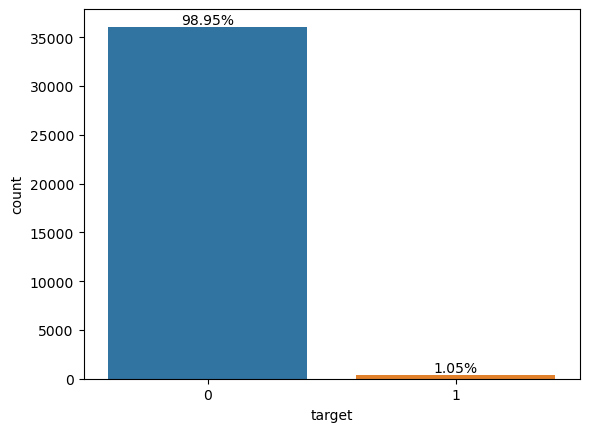

In [171]:
# Target Ratio
target_ratios = df['target'].value_counts(normalize=True)
sns.countplot(x="target", data=df)
for i, ratio in enumerate(target_ratios):
    plt.text(i, df['target'].value_counts()[i], f'{ratio:.2%}', ha='center', va='bottom')

plt.show()

The target ratio of 1.05% for 'Bad Customers' and 98.95% for 'Good Customers' suggests a class imbalance issue, which might require applying over or undersampling techniques to solve this data distribution.

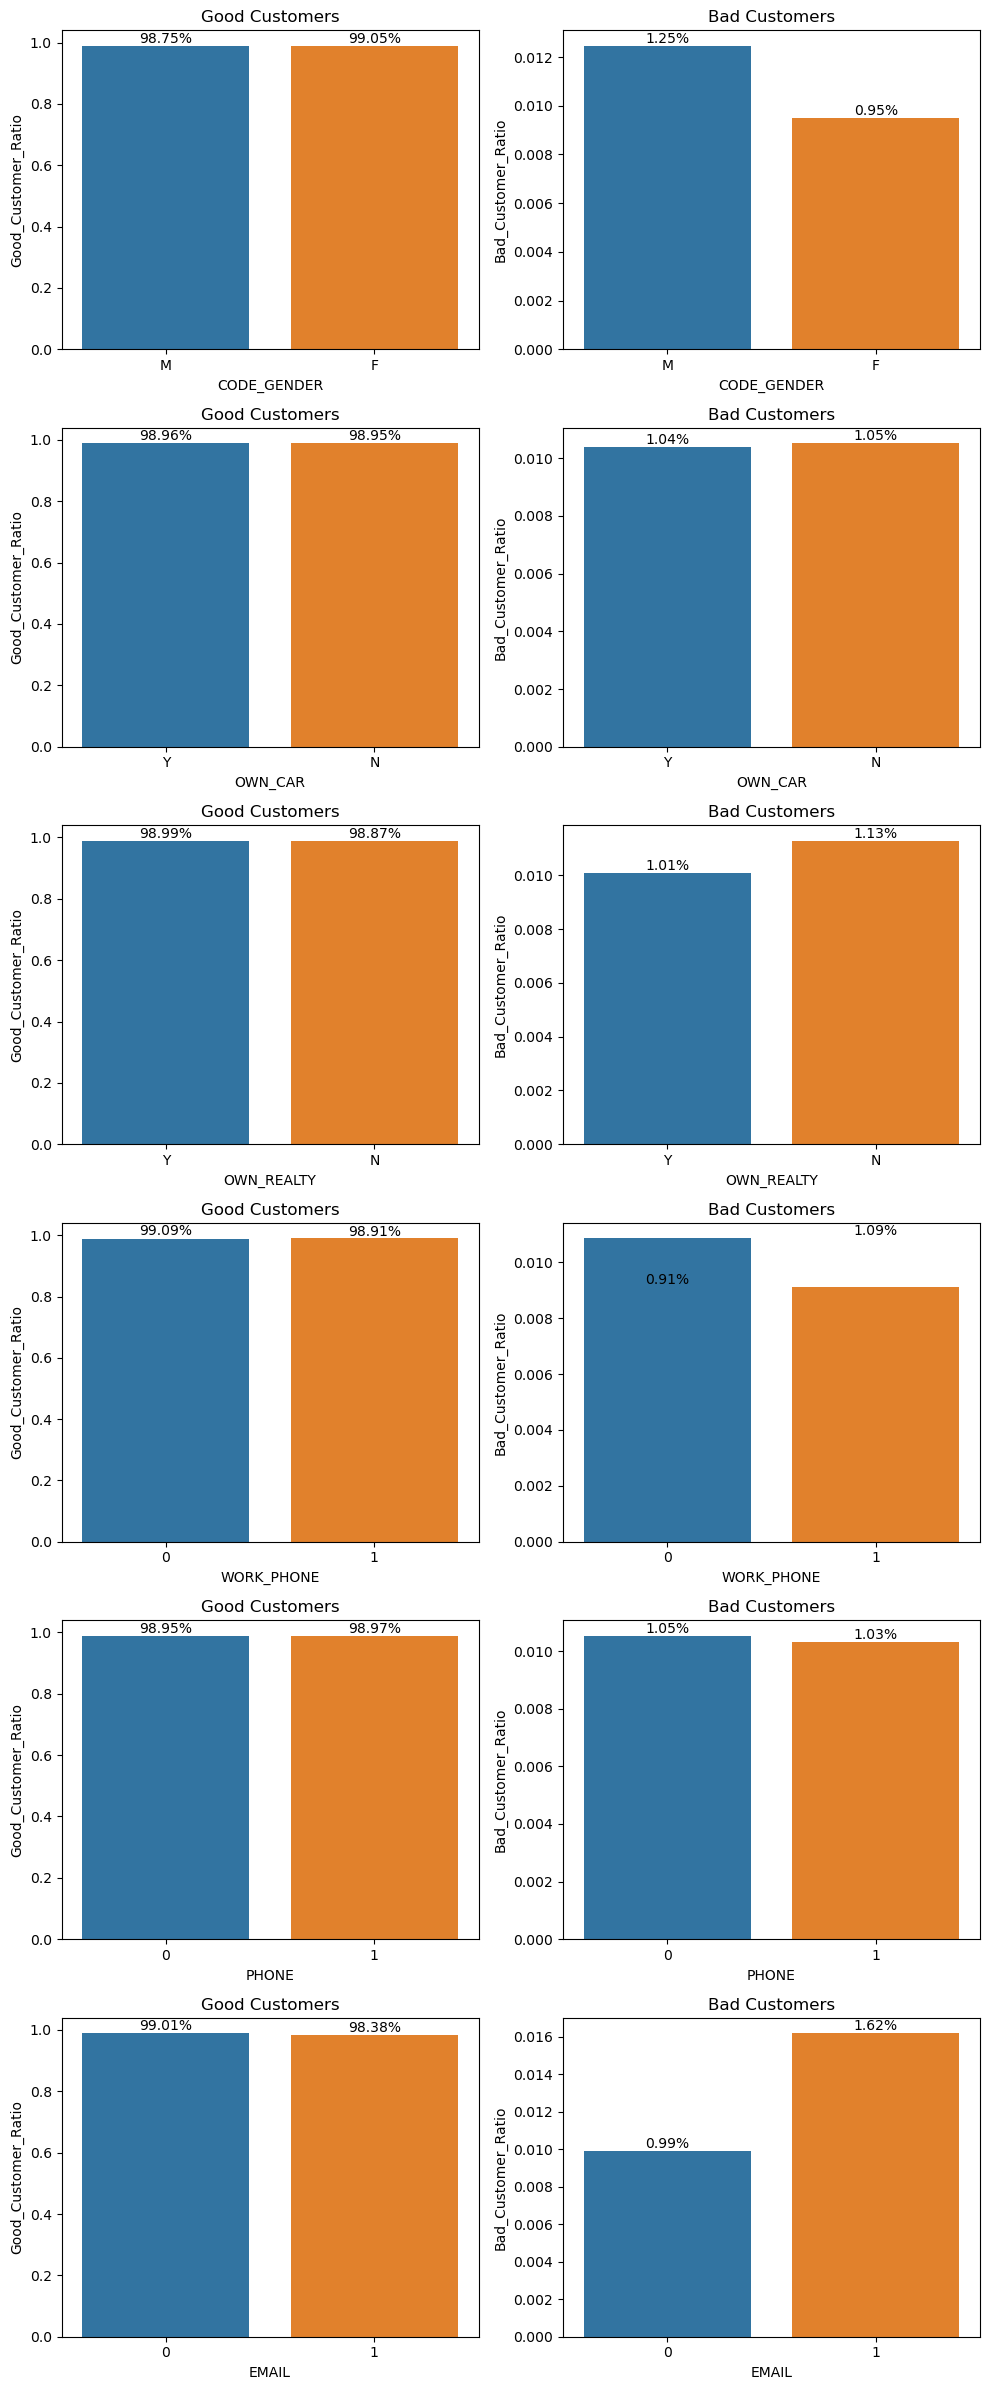

In [275]:
# Binary Columns
binary_columns = df.columns[df.nunique() == 2][:6]

# Create a figure with subplots
fig, axes = plt.subplots(len(binary_columns), 2, figsize=(10, 24))

for i, column in enumerate(binary_columns):
    Y, N = df[column].unique()

    a, c = df[df[column] == Y]["target"].value_counts(normalize=True)
    b, d = df[df[column] == N]["target"].value_counts(normalize=True)

    # Remove "FLAG_" pattern from the column value
    column = column.replace('FLAG_', '')

    aux = pd.DataFrame({column: [Y, N], 'Good_Customer_Ratio': [a, b], 'Bad_Customer_Ratio': [c, d]})
    sns.barplot(x=column, y='Good_Customer_Ratio', data=aux, ax=axes[i, 0])
    axes[i, 0].set_title('Good Customers')
    for j, ratio in enumerate(aux.Good_Customer_Ratio):
        axes[i, 0].text(j, aux.Good_Customer_Ratio[j], f'{ratio:.2%}', ha='center', va='bottom')

    sns.barplot(x=column, y='Bad_Customer_Ratio', data=aux, ax=axes[i, 1])
    axes[i, 1].set_title('Bad Customers')
    for j, ratio in enumerate(aux.Bad_Customer_Ratio):
        axes[i, 1].text(j, aux.Bad_Customer_Ratio[j], f'{ratio:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In the plots above, we can notice Gender, not having a work phone and having an email are variables that could be related to bad customers. 

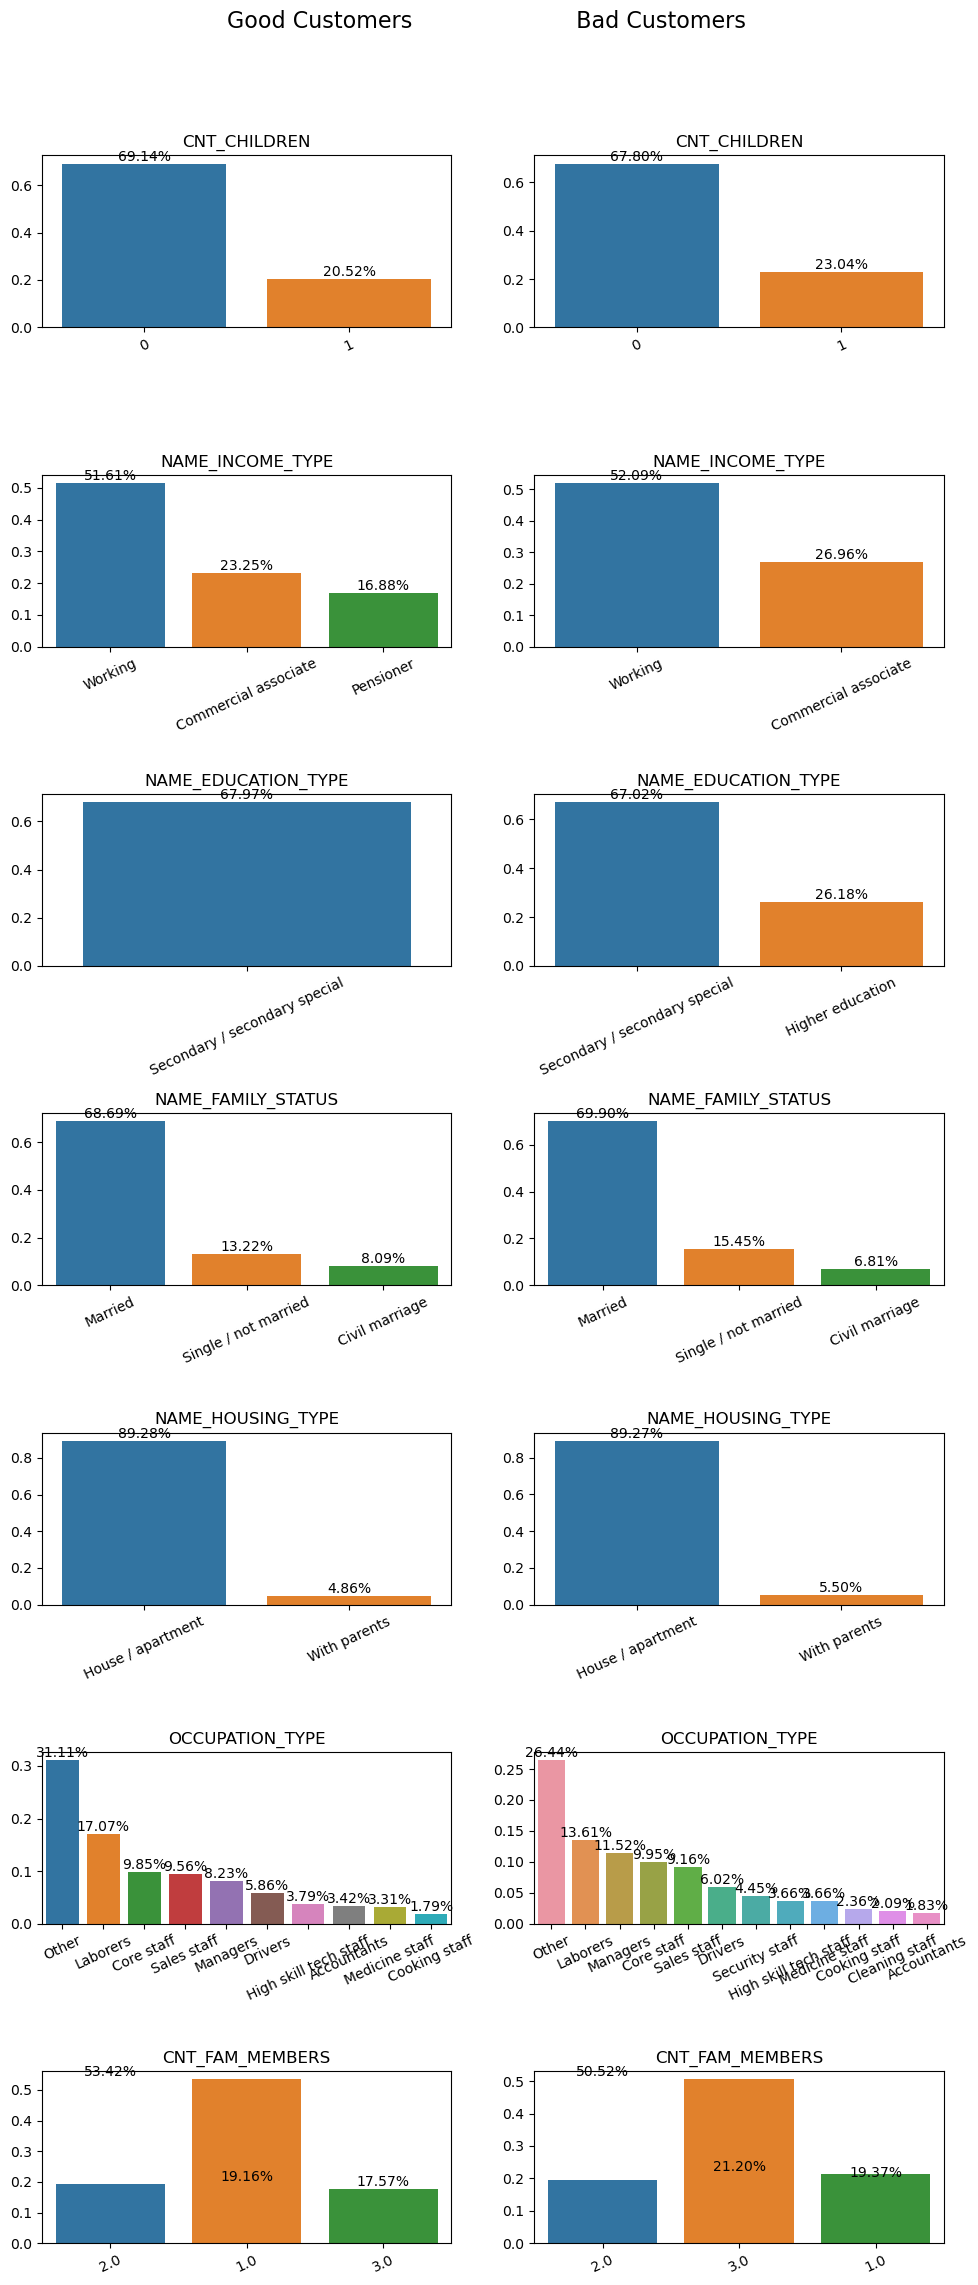

In [353]:
#Now let's create visualitazions of the columns that are no binary (Ordinal and Cardinal)
#Some of the variables have a lot of single values, we will limit our sample to only 95 % of the data of that column.
columns=['CNT_CHILDREN', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 
'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']

# Create a figure with subplots
fig, axes = plt.subplots(len(columns), 2, figsize=(10, 24))
#Title
plt.suptitle("Good Customers                       Bad Customers", fontsize=16)

for i, column in enumerate(columns):
    
    #Plot1
    vc_norm = df[df["target"] == 0][column].value_counts(normalize=True)
    vc_norm = vc_norm[vc_norm.cumsum() <= 0.95]

    sns.barplot(x=vc_norm.index,y=vc_norm.values, ax=axes[i, 0])
    axes[i, 0].set_title(column)
    axes[i, 0].set_xticklabels(vc_norm.index, rotation=25)
    for j, ratio in enumerate(vc_norm.values):
        axes[i, 0].text(j, vc_norm.values[j], f'{ratio:.2%}', ha='center', va='bottom')

    #Plot2
    vc_norm = df[df["target"] == 1][column].value_counts(normalize=True)
    vc_norm = vc_norm[vc_norm.cumsum() <= 0.95]

    sns.barplot(x=vc_norm.index,y=vc_norm.values, ax=axes[i, 1])
    axes[i, 1].set_title(column)
    axes[i, 1].set_xticklabels(vc_norm.index, rotation=25)
    for j, ratio in enumerate(vc_norm.values):
        axes[i, 1].text(j, vc_norm.values[j], f'{ratio:.2%}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

The variables "Number of children","Income type", "Housing Type", do not appear to significantly influence customer categorizations as good or bad. Conversely, individuals with secondary education demonstrate a higher ratio in our applications sample. Those with unspecified occupation types exhibit notable proportions of the data. Families with three members are predominantly associated with unfavorable customer reputations versus family of size one with more of 53 % of the good customer ratio.

### Continious Variables

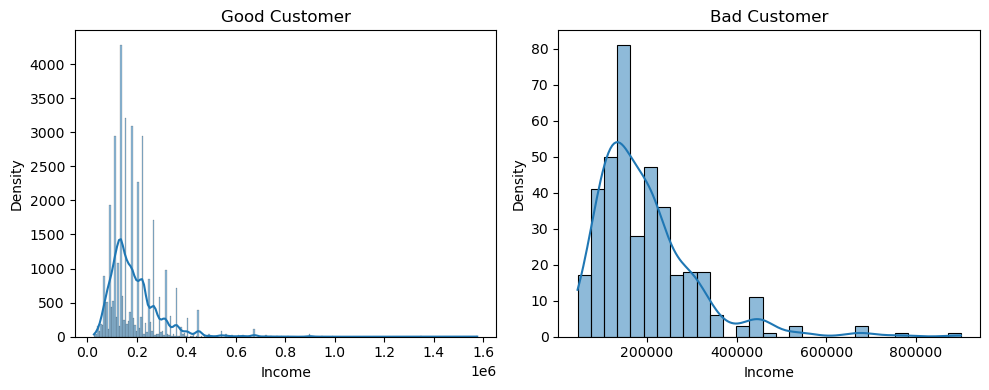

In [384]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Plotting the distributions
sns.histplot(data=df[df.target == 0], x="AMT_INCOME_TOTAL", kde=True, ax=ax[0])
sns.histplot(data=df[df.target == 1], x="AMT_INCOME_TOTAL", kde=True, ax=ax[1])

# Set titles and labels 
ax[0].set_title('Good Customer')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Density')

ax[1].set_title('Bad Customer')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

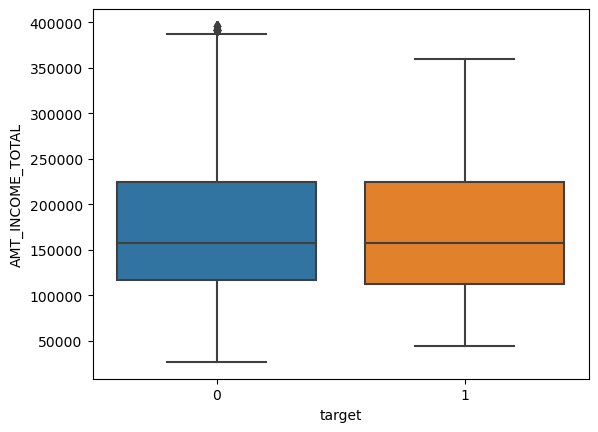

In [388]:
sns.boxplot(x="target", y="AMT_INCOME_TOTAL", data=df[df.AMT_INCOME_TOTAL<=400000])
plt.show()

In [356]:
df["AMT_INCOME_TOTAL"]

0        427500.0
1        427500.0
2        112500.0
3        270000.0
4        270000.0
           ...   
36452    315000.0
36453    157500.0
36454    157500.0
36455    283500.0
36456    112500.0
Name: AMT_INCOME_TOTAL, Length: 36457, dtype: float64